In [1]:
# !pip install stepmix

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import rand_score

from stepmix.stepmix import StepMix

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load dataset in a Dataframe
data_continuous, target = load_iris(return_X_y=True, as_frame=True)

# Continuous StepMix Model with 3 latent classes
model = StepMix(n_components=3, measurement="continuous", verbose=0, progress_bar=0, random_state=123)

# Fit model and predict clusters
model.fit(data_continuous)
pred_continuous = model.predict(data_continuous)

# A Rand score close to 1 indicates good alignment between clusters and flower types
print(rand_score(pred_continuous, target))

0.9267114093959732


In [4]:
# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
print(data)

       hair_color eye_color skin_color
person                                
P1         blonde     amber       fair
P2       brunette      gray      brown
P3            red     green      brown
P4          black     hazel      brown
P5       brunette     amber       fair
P6          black      gray      brown
P7            red     green       fair
P8          black     hazel       fair


In [5]:
pd.get_dummies(data)

,hair_color_black,hair_color_blonde,hair_color_brunette,hair_color_red,eye_color_amber,eye_color_gray,eye_color_green,eye_color_hazel,skin_color_brown,skin_color_fair
person,,,,,,,,,,
P1,False,True,False,False,True,False,False,False,False,True
P2,False,False,True,False,False,True,False,False,True,False
P3,False,False,False,True,False,False,True,False,True,False
P4,True,False,False,False,False,False,False,True,True,False
P5,False,False,True,False,True,False,False,False,False,True
P6,True,False,False,False,False,True,False,False,True,False
P7,False,False,False,True,False,False,True,False,False,True
P8,True,False,False,False,False,False,False,True,False,True


In [6]:
# Continuous StepMix Model with 3 latent classes
model = StepMix(n_components=4, measurement="categorical", verbose=0, progress_bar=0, random_state=123)

# Fit model and predict clusters
model.fit(pd.get_dummies(data))
clusters = model.predict(pd.get_dummies(data))

In [7]:
model.aic(pd.get_dummies(data)), model.bic(pd.get_dummies(data))

(130.36141955583662, 133.77740584806958)

In [8]:
model.report(pd.get_dummies(data))  #.get_parameters()['measurement']['pis']#.shape

MODEL REPORT
    Measurement model parameters
        ------------------------------------------------------------------------
        Multinoulli model with 10 features, each with up to 2 possible outcomes
        ------------------------------------------------------------------------
        Columns 1 to 2 are associated with the first feature,
        columns 3 to 4 are associated with the second feature, etc.

        Class 1 : [1.0000 0.0000 1.0000 0.0000 1.0000 0.0000 0.0000 1.0000 1.0000 0.0000
 1.0000 0.0000 0.0000 1.0000 1.0000 0.0000 0.5000 0.5000 0.5000 0.5000]
        Class 2 : [0.0000 1.0000 1.0000 0.0000 1.0000 0.0000 1.0000 0.0000 1.0000 0.0000
 1.0000 0.0000 1.0000 0.0000 0.0000 1.0000 0.5000 0.5000 0.5000 0.5000]
        Class 3 : [0.5000 0.5000 1.0000 0.0000 0.5000 0.5000 1.0000 0.0000 1.0000 0.0000
 0.0000 1.0000 1.0000 0.0000 1.0000 0.0000 0.0000 1.0000 1.0000 0.0000]
        Class 4 : [1.0000 0.0000 0.5000 0.5000 0.5000 0.5000 1.0000 0.0000 0.0000 1.0000
 1.0000 0

In [9]:
model.feature_names_in_

array(['hair_color_black', 'hair_color_blonde', 'hair_color_brunette',
       'hair_color_red', 'eye_color_amber', 'eye_color_gray',
       'eye_color_green', 'eye_color_hazel', 'skin_color_brown',
       'skin_color_fair'], dtype=object)

In [10]:
for values in model.get_parameters()['measurement']['pis']:
    print(list(values)[::2])

[0.999999999999999, 0.999999999999999, 0.999999999999999, 1e-15, 0.999999999999999, 0.999999999999999, 1e-15, 0.999999999999999, 0.5, 0.5]
[1e-15, 0.999999999999999, 0.999999999999999, 0.999999999999999, 0.999999999999999, 0.999999999999999, 0.999999999999999, 1e-15, 0.5, 0.5]
[0.5, 0.999999999999999, 0.5, 0.999999999999999, 0.999999999999999, 1e-15, 0.999999999999999, 0.999999999999999, 1e-15, 0.999999999999999]
[0.999999999999999, 0.5, 0.5, 0.999999999999999, 1e-15, 0.999999999999999, 0.999999999999999, 0.999999999999999, 0.999999999999999, 1e-15]


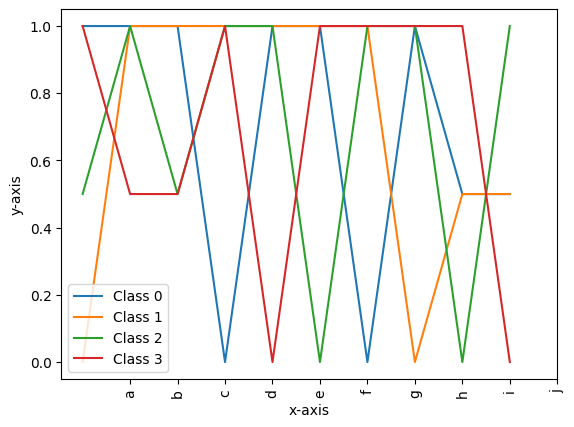

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x_range = range(int(model.get_parameters()['measurement']['total_outcomes']  / 2))

for i, values in enumerate(model.get_parameters()['measurement']['pis']):
    plt.plot(x_range, np.array(list(values)[::2]), label=f'Class {i}')  

# Add grid lines 
#plt.grid(True)  

# Add a legend
plt.legend()  

# Add the ticks
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], 
           rotation=90)#, fontsize=8, ha='right', va='bottom')

# Add x-axis and y-axis labels
plt.xlabel('x-axis')
plt.ylabel('y-axis') 

# Function to show plot 
plt.show()

In [14]:
data.insert(0, "Cluster", clusters, True)
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,3,blonde,amber,fair
P2,2,brunette,gray,brown
P3,0,red,green,brown
P4,1,black,hazel,brown
P5,3,brunette,amber,fair
P6,2,black,gray,brown
P7,0,red,green,fair
P8,1,black,hazel,fair
